In [1]:
import numpy as np

from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
from pypfopt import risk_models

# from openbb_terminal.sdk import openbb
import openbb
import seaborn as sns
sns.set_theme()

In [8]:
prices = openbb.sdk.equity.price.historical(["AAPL", "BBY", "BAC", "SBUX", "T"])


In [2]:
import yfinance as yf
prices = yf.download(["AAPL", "BBY", "BAC", "SBUX", "T"], start="2002-01-01", end="2024-06-30")

[*********************100%***********************]  5 of 5 completed


In [3]:
prices = prices['Adj Close']

NameError: name 'data' is not defined

In [22]:
viewdict = {
    "AAPL": 0.20, 
    "BBY": 0.25,
    "BAC": 0.10,
    "SBUX": 0.2,
    "T": 0.15
}

cov_matrix = risk_models.sample_cov(prices)

In [23]:
cov_matrix

Ticker,AAPL,BAC,BBY,SBUX,T
Ticker,,,,,
AAPL,0.114689,0.051968,0.046558,0.041613,0.027282
BAC,0.051968,0.196983,0.063967,0.059316,0.043952
BBY,0.046558,0.063967,0.164909,0.047479,0.030630
SBUX,0.041613,0.059316,0.047479,0.094088,0.026870
T,0.027282,0.043952,0.030630,0.026870,0.058541


<Axes: xlabel='Volatility', ylabel='Return'>

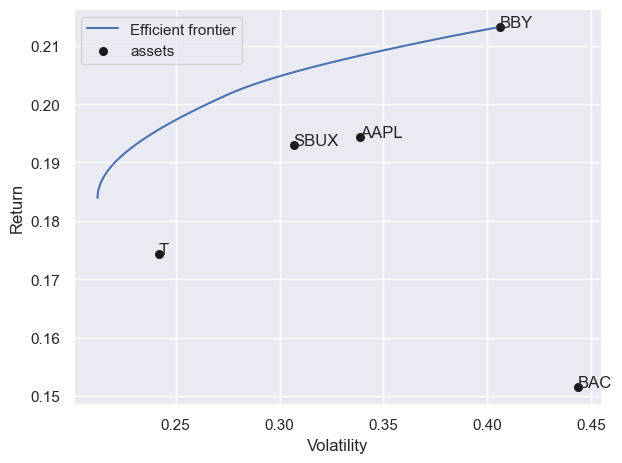

In [24]:
bl = BlackLittermanModel(
cov_matrix,
absolute_views=viewdict,
pi="equal"
)

rets = bl.bl_returns()
ef = EfficientFrontier(rets, cov_matrix)
weights = bl.bl_weights()

plotting.plot_efficient_frontier(ef, show_tickers=True)
